In [9]:
pip install pytrends


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pytrends.request import TrendReq

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import folium

In [37]:
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["tech", "unboxing"]

pytrends.build_payload(kw_list, cat=0, timeframe='today 3-m', geo='', gprop='youtube')

In [38]:
df_queries = pytrends.related_queries()

In [39]:
top_tech = df_queries.get("tech").get("top")
top_unboxing = df_queries.get("unboxing").get("top")

df_top = pd.concat([top_tech, top_unboxing] )

df_top.sort_values(['value'], ascending = False).head(5).reset_index(drop = True)

,query,value
0,m4 tech,100
1,unboxing dude,100
2,unboxing iphone,83
3,iphone,80
4,samsung,59


In [41]:
rising_tech = df_queries.get("tech").get("rising")
rising_unboxing = df_queries.get("unboxing").get("rising")

df_rising = pd.concat([rising_tech, rising_unboxing] )

df_rising.sort_values(['value'], ascending = False).head(10)

,query,value
0,oneplus nord ce 5g unboxing,93350
1,oneplus nord 2 5g unboxing,15100
0,mini world,7900
1,collect different io tech weapons,6900
2,butter album unboxing,5900
2,deal damage with io tech weapons,3100
3,oppo reno 6 5g unboxing,2800
5,oppo reno 6 unboxing,2200
4,nord 2 unboxing,2200
6,oneplus nord 2,2100


In [43]:
kw_list = ["oneplus nord ce 5g unboxing", "oneplus nord 2 5g unboxing", "mini world	", "collect different io tech weapons"]

pytrends.build_payload(kw_list, cat=0, timeframe='today 3-m', geo='', gprop='youtube')

df_interest = pytrends.interest_over_time().drop(columns='isPartial')

Text(0.5, 1.0, 'Tech Trends Over Time')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


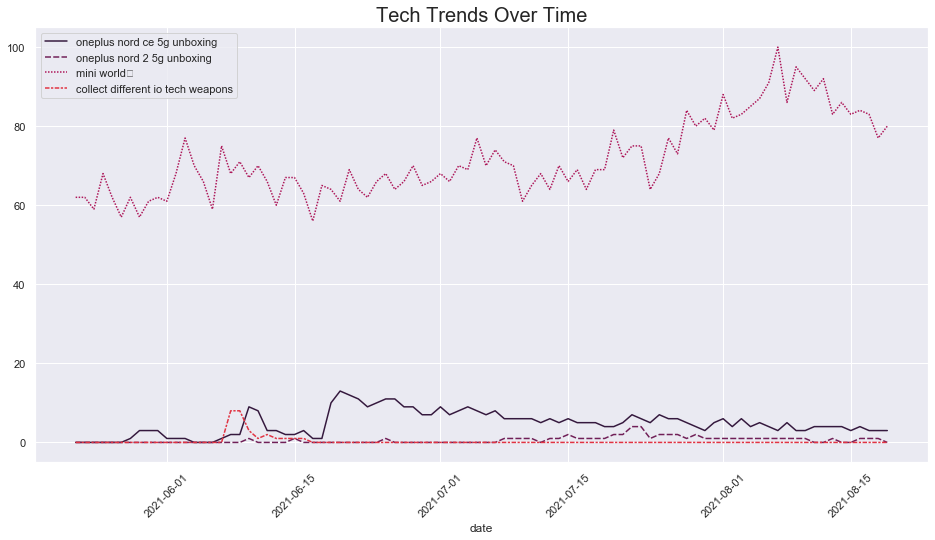

In [44]:
plt.figure(figsize=(16, 8))

plt.xticks(rotation=45)

sns.set(style="darkgrid", palette = 'rocket')

ax = sns.lineplot(data=df_interest)

ax.set_title('Tech Trends Over Time', fontsize=20)